<a href="https://colab.research.google.com/github/ArshiaRa/Crime-count-with-logistic-regression/blob/main/Arshia_Rashidi_Mehrabadi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraies needed for the program


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

I used dython library to generate a heatmap to find relations between categorical and numerical variables to extract more important features.
To do that, I needed to install the library on collab and import a function from it.
There are other ways to use dython, but this way was recommended on their website, and it's the easiest.

In [ ]:
!pip install dython
from dython.nominal import associations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Reading and evaluating the dataset

Reading the dataset using pandas and putting in a dataframe.
I printed the dataframe in order to view it.

In [ ]:
df= pd.read_csv ('/content/reduced_version_data.csv')
df

,Sector,Community Name,Group Category,Category,Crime Count,Resident Count,Year,Month
0,NORTHEAST,WHITEHORN,Crime,Street Robbery,1,12019,2019,SEP
1,EAST,FOOTHILLS,Crime,Theft OF Vehicle,10,317,2019,NOV
2,SOUTH,ACADIA,Crime,Theft FROM Vehicle,13,10520,2019,SEP
3,SOUTHEAST,MAHOGANY,Crime,Theft OF Vehicle,1,11784,2019,NOV
4,WEST,LINCOLN PARK,Crime,Commercial Break & Enter,5,2617,2019,NOV
...,...,...,...,...,...,...,...,...
99995,SOUTH,WOODBINE,Disorder,Physical Disorder,2,9131,2013,JAN
99996,WEST,NORTH GLENMORE PARK,Crime,Assault (Non-domestic),2,2333,2014,MAR
99997,SOUTH,HAYSBORO,Disorder,Physical Disorder,5,6943,2012,SEP
99998,SOUTH,FAIRVIEW INDUSTRIAL,Disorder,Social Disorder,7,0,2013,MAR


Before spliting the dataset into train and test, I checked the dataset to understand it better.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Sector          100000 non-null  object
 1   Community Name  100000 non-null  object
 2   Group Category  100000 non-null  object
 3   Category        100000 non-null  object
 4   Crime Count     100000 non-null  int64 
 5   Resident Count  100000 non-null  int64 
 6   Year            100000 non-null  int64 
 7   Month           100000 non-null  object
dtypes: int64(3), object(5)
memory usage: 6.1+ MB


I checked to see if there were any NaN or Null values. I knew from the class that this dataset is clean, so these steps are not necessary, but still good practice.

In [ ]:
df.isnull().values.any()

False

In order to find out the most robust features related to the target value which is 'Crime Count' I used dython to generate a feature map showing relations between both numerical and categorical variables. The heat map is a matrix with 1 all ghotre asle. It can be inferred from the heatmap that there is not a strong relationship between our target value and independent features as might have excpected. The most related features to target variable according to the heat map are:


1.   Community Name
2.   Group Category
3.Category


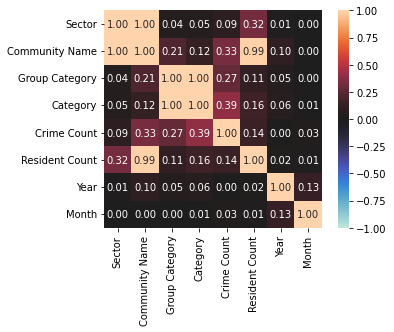

{'corr':                   Sector  Community Name  Group Category  Category  \
 Sector          1.000000        0.996559        0.044732  0.045672   
 Community Name  0.996559        1.000000        0.211473  0.118023   
 Group Category  0.044732        0.211473        1.000000  0.999955   
 Category        0.045672        0.118023        0.999955  1.000000   
 Crime Count     0.087364        0.332007        0.274268  0.392315   
 Resident Count  0.321216        0.991292        0.105092  0.161716   
 Year            0.014767        0.100449        0.045512  0.060167   
 Month           0.000000        0.000000        0.000000  0.005505   
 
                 Crime Count  Resident Count      Year     Month  
 Sector             0.087364        0.321216  0.014767  0.000000  
 Community Name     0.332007        0.991292  0.100449  0.000000  
 Group Category     0.274268        0.105092  0.045512  0.000000  
 Category           0.392315        0.161716  0.060167  0.005505  
 Crime Count    

In [ ]:
associations(df)

# Make changes and split the dataset

In the dataset, there are some categorical variables. Linear Regression doesn't understand categorical variables, so I used *get_dummies* to convert strings to binary values. Using *get_dummies* or One Hot Encoding is a popular method in most cases. Still, if the dataset is large or categorical variables have more cases, it can affect the accuracy of the model due to the big size of the model. I tried frequency encoding, an encoding technique that encodes categorical feature values to their frequencies. In this way, I was able to keep the dataset the same size (100000 rows × 8 columns) instead of (100000 rows × 330 columns) when I used *get_dummies*, but I got less accuracy with it (around 22% on test and train).

In making dummy variables, if we have G categories for a feature, we can represent that with G-1 categories and decrease the number of the columns we make because we can still have the same result with one column lesser, so I set drop_first to True.

In [ ]:
x = df.drop(columns='Crime Count')
y = df['Crime Count']
x = pd.get_dummies(data=x, drop_first=True)
x

,Resident Count,Year,Sector_EAST,Sector_NORTH,Sector_NORTHEAST,Sector_NORTHWEST,Sector_SOUTH,Sector_SOUTHEAST,Sector_WEST,Community Name_01C,...,Month_DEC,Month_FEB,Month_JAN,Month_JUL,Month_JUN,Month_MAR,Month_MAY,Month_NOV,Month_OCT,Month_SEP
0,12019,2019,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,317,2019,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,10520,2019,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,11784,2019,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2617,2019,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9131,2013,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
99996,2333,2014,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
99997,6943,2012,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99998,0,2013,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


The most efficient technique that I used to improve the performance of the model was Log Transformation. Crime Count distribution compared to our independent features doesn't have a normal distribution. I used Log Transformation to improve the normalization of the dataset.

**Without using this method I got 30% accuracy on test set and training set.**

In [ ]:
y = np.log10(y)

After One Hot Encoding of the variables, I realized all the values were close together except the values in Year and Resident Count columns. So, I tried data normalization to scale these two columns to values between 0 and 1. I tried that for both columns, but the best result comes from only normalizing one of the columns. The year column now has values between 0 and 1.

**By removing normalization of one of the columns I got 56% accuracy on my model both on training set and test set.**

In [ ]:
column = 'Year'
x[column] = (x[column] - x[column].min()) / (x[column].max() - x[column].min())    

display(x)

,Resident Count,Year,Sector_EAST,Sector_NORTH,Sector_NORTHEAST,Sector_NORTHWEST,Sector_SOUTH,Sector_SOUTHEAST,Sector_WEST,Community Name_01C,...,Month_DEC,Month_FEB,Month_JAN,Month_JUL,Month_JUN,Month_MAR,Month_MAY,Month_NOV,Month_OCT,Month_SEP
0,12019,1.000000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,317,1.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,10520,1.000000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,11784,1.000000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2617,1.000000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9131,0.142857,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
99996,2333,0.285714,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
99997,6943,0.000000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99998,0,0.142857,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


I split the dataset to train and dev (test) the dataset as instructed in the assignment.

In [ ]:
X_train, X_dev, y_train, y_dev = train_test_split (x,y, train_size=0.7)

In [ ]:
X_train.shape, y_train.shape, X_dev.shape, y_dev.shape

((70000, 330), (70000,), (30000, 330), (30000,))

Different scales of features can affect the accuracy of the model. I used StandardScaler to standardaize the data. After this, the transformed features have 0 mean and and a standard deviation of 1 to make the data scale free.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_dev = scaler.transform(X_dev)

# Creating the model and evaluating the performance

I created the model, and fit it on train dataset. Then I made a prediction based on the Crime Count in the dev set to use it for the mean squared error. After that, I computed the scores of my model on the training and the test dataset.

In [ ]:
model = LinearRegression()
  
model.fit(X_train, y_train)

Prediction = model.predict(X_dev)

mse = mean_squared_error(y_dev , Prediction)
print('Mean Squared Error : ', mse)

print('Score(X_train, Y_train): ',model.score(X_train, y_train))

print('Score(X_dev, Y_dev): ',model.score(X_dev, y_dev))


Mean Squared Error :  0.07948743931765465
Score(X_train, Y_train):  0.6996319760782308
Score(X_dev, Y_dev):  0.6894241080117682


In [ ]:
mse_scaled_back = mean_squared_error(y_dev , np.exp(Prediction))
print('Mean Squared Error : ', mse_scaled_back)

Mean Squared Error :  2.0089698785549657
